In [2]:
import requests
url="http://gutenberg.net.au/ebooks01/0100021.txt"
r=requests.get(url)
cuerpo=r.text

In [3]:
import re
from collections import Counter

# Descargar el texto del libro
url = "http://gutenberg.net.au/ebooks01/0100021.txt"
r = requests.get(url)
cuerpo = r.text

# Encontrar todos los verbos regulares en pasado (terminados en -ed)
verbos_en_past = re.findall(r'\b\w+ed\b', cuerpo, re.IGNORECASE)

# Contar la frecuencia de cada verbo
conteo_verbos = Counter(verbos_en_past)

# Obtener los 10 verbos regulares más comunes
top_10_verbos = conteo_verbos.most_common(10)

# Imprimir el resultado
for verbo, conteo in top_10_verbos:
    print(f'{verbo}: {conteo}')


seemed: 173
looked: 82
turned: 74
called: 69
happened: 66
bed: 57
used: 49
stopped: 41
appeared: 40
changed: 36


In [4]:
import requests
import re
from collections import Counter
import string

# Descargar el texto del libro
url = "http://gutenberg.net.au/ebooks01/0100021.txt"
r = requests.get(url)
cuerpo = r.text

# Transformar el texto a minúsculas
cuerpo = cuerpo.lower()

# Eliminar signos de puntuación
cuerpo = cuerpo.translate(str.maketrans('', '', string.punctuation))

# Encontrar todos los verbos regulares en pasado (terminados en -ed)
verbos_en_past = re.findall(r'\b\w+ed\b', cuerpo)

# Contar la frecuencia de cada verbo
conteo_verbos = Counter(verbos_en_past)

# Obtener los 10 verbos regulares más comunes
top_10_verbos = conteo_verbos.most_common(10)

# Imprimir el resultado
for verbo, conteo in top_10_verbos:
    print(f'{verbo}: {conteo}')


seemed: 173
looked: 82
turned: 74
called: 65
happened: 65
bed: 54
used: 48
stopped: 41
appeared: 40
changed: 36


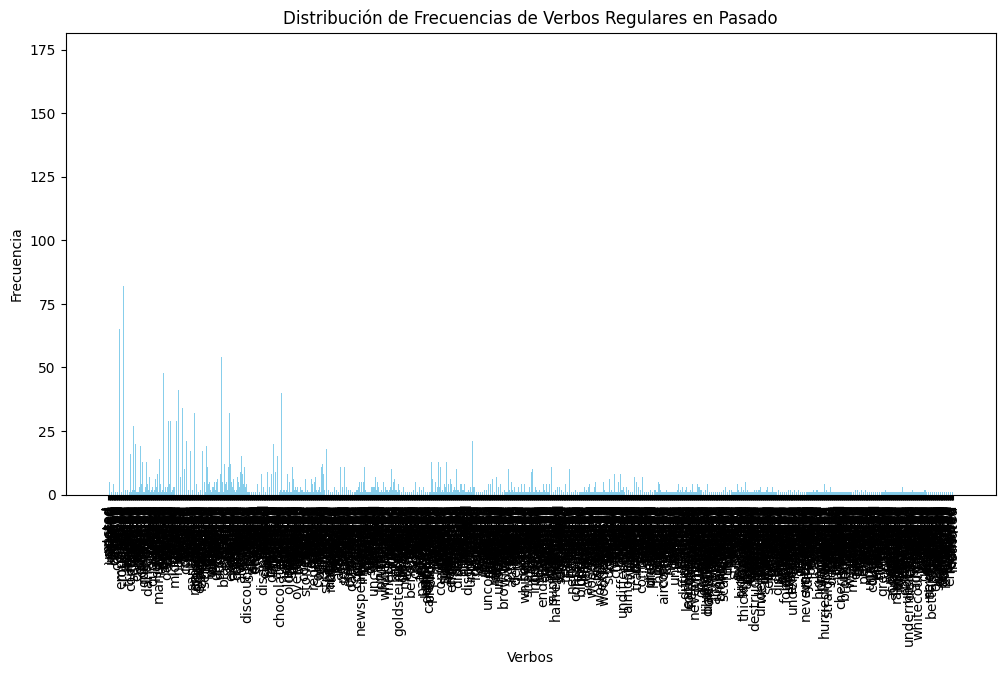

In [6]:
import matplotlib.pyplot as plt

def grafico_barras_frecuencia(conteo_verbos):
    # Extraer los verbos y sus frecuencias
    verbos = list(conteo_verbos.keys())
    frecuencias = list(conteo_verbos.values())

    plt.figure(figsize=(12, 6))
    plt.bar(verbos, frecuencias, color='skyblue')
    plt.xlabel('Verbos')
    plt.ylabel('Frecuencia')
    plt.title('Distribución de Frecuencias de Verbos Regulares en Pasado')
    plt.xticks(rotation=90)
    plt.show()

# Llamar a la función
grafico_barras_frecuencia(conteo_verbos)


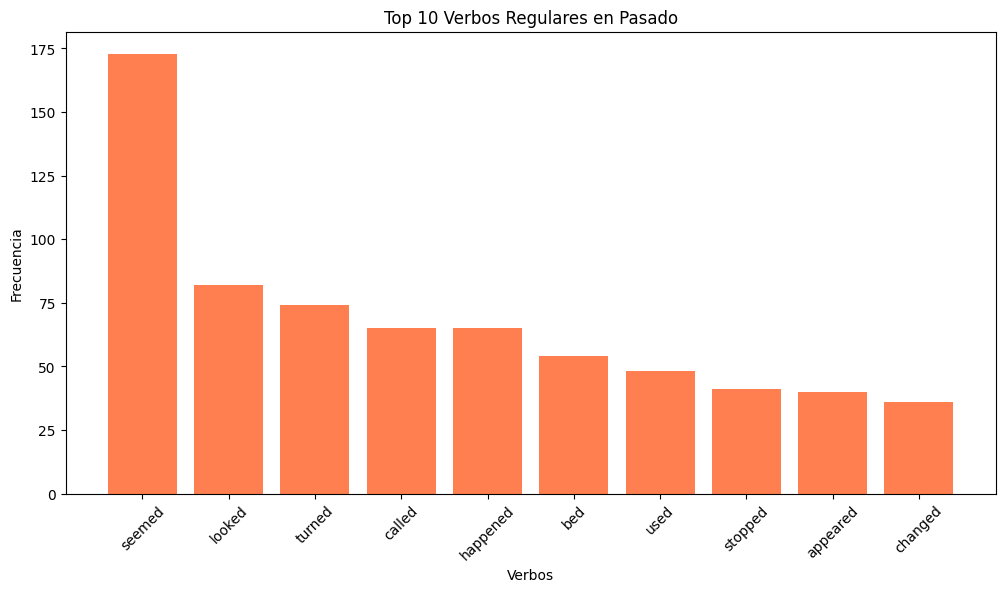

In [7]:
def grafico_top_10(top_10_verbos):
    verbos, frecuencias = zip(*top_10_verbos)

    plt.figure(figsize=(12, 6))
    plt.bar(verbos, frecuencias, color='coral')
    plt.xlabel('Verbos')
    plt.ylabel('Frecuencia')
    plt.title('Top 10 Verbos Regulares en Pasado')
    plt.xticks(rotation=45)
    plt.show()

# Llamar a la función
grafico_top_10(top_10_verbos)


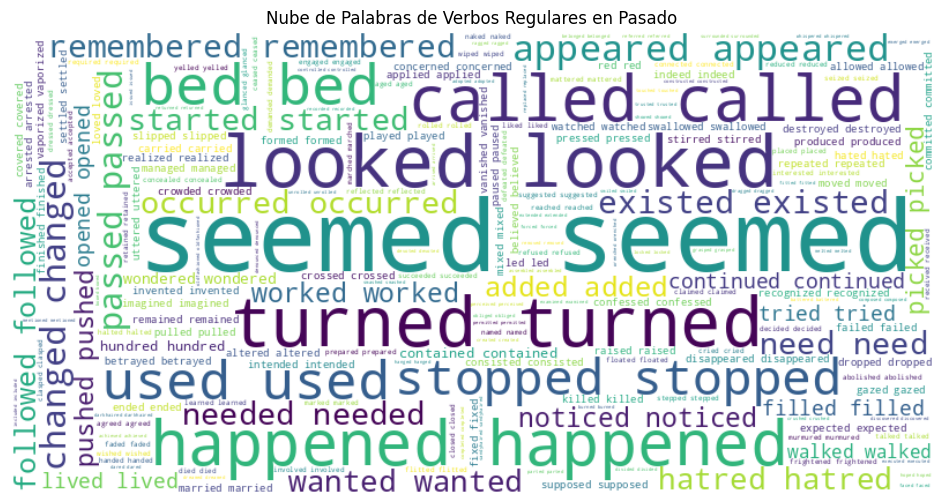

In [8]:
from wordcloud import WordCloud

def nube_palabras(conteo_verbos):
    # Crear una cadena de texto para la nube de palabras
    texto = ' '.join([verbo for verbo in conteo_verbos for _ in range(conteo_verbos[verbo])])

    # Crear la nube de palabras
    nube = WordCloud(width=800, height=400, background_color='white').generate(texto)

    plt.figure(figsize=(12, 6))
    plt.imshow(nube, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nube de Palabras de Verbos Regulares en Pasado')
    plt.show()

# Llamar a la función
nube_palabras(conteo_verbos)


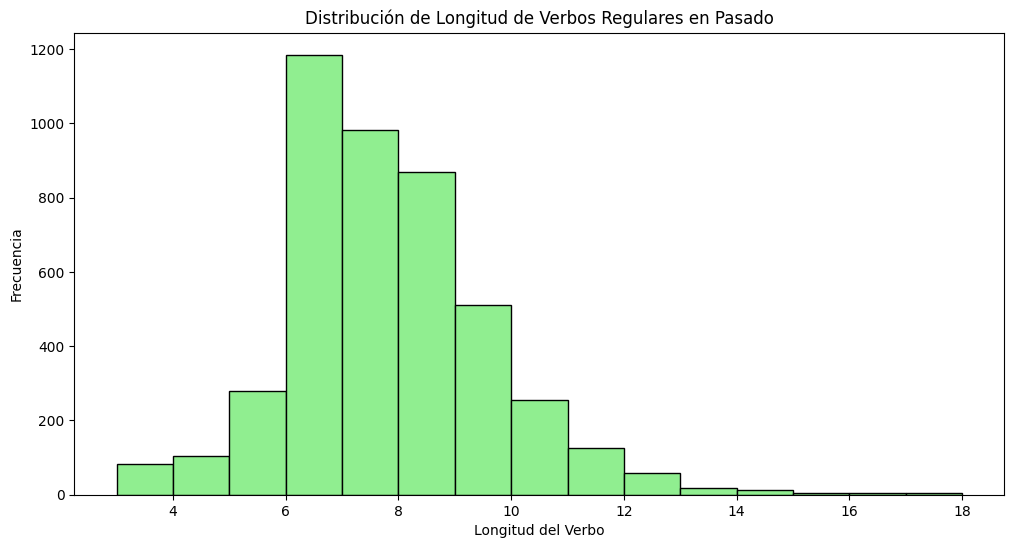

In [9]:
def histograma_longitud(verbos_en_past):
    longitudes = [len(verbo) for verbo in verbos_en_past]

    plt.figure(figsize=(12, 6))
    plt.hist(longitudes, bins=range(min(longitudes), max(longitudes) + 1), color='lightgreen', edgecolor='black')
    plt.xlabel('Longitud del Verbo')
    plt.ylabel('Frecuencia')
    plt.title('Distribución de Longitud de Verbos Regulares en Pasado')
    plt.show()

# Llamar a la función
histograma_longitud(verbos_en_past)


## Técnicas de Machine Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

# Cargar el conjunto de datos de noticias
dataset = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
texts, labels = dataset.data, dataset.target
label_names = dataset.target_names

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.3, random_state=42)

# Crear un pipeline que vectoriza el texto y aplica el clasificador SVM
model = make_pipeline(TfidfVectorizer(), SVC(kernel='linear', C=1))

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
predictions = model.predict(X_test)

In [2]:
# Evaluar el rendimiento del modelo
print("Classification Report:")
print(classification_report(y_test, predictions, target_names=label_names))

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.59      0.61      0.60       236
           comp.graphics       0.66      0.71      0.69       287
 comp.os.ms-windows.misc       0.69      0.68      0.69       290
comp.sys.ibm.pc.hardware       0.64      0.67      0.66       285
   comp.sys.mac.hardware       0.80      0.67      0.73       312
          comp.windows.x       0.87      0.75      0.81       308
            misc.forsale       0.77      0.72      0.74       276
               rec.autos       0.74      0.74      0.74       304
         rec.motorcycles       0.44      0.81      0.57       279
      rec.sport.baseball       0.81      0.85      0.83       308
        rec.sport.hockey       0.95      0.84      0.89       309
               sci.crypt       0.89      0.73      0.80       290
         sci.electronics       0.60      0.70      0.65       304
                 sci.med       0.81      0.81      0

<Figure size 1000x700 with 0 Axes>

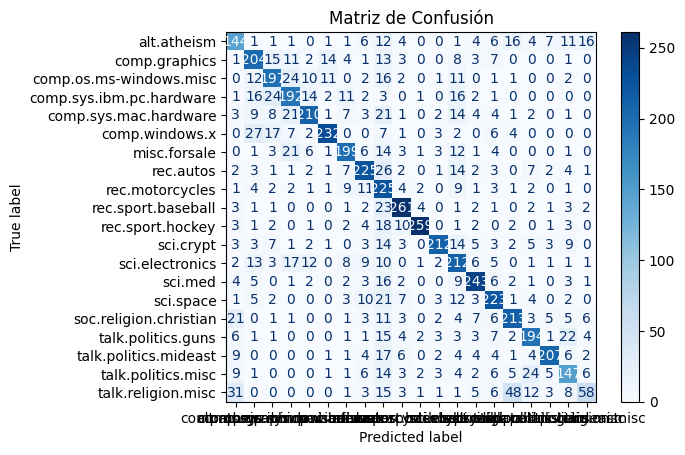

In [3]:
# Crear una matriz de confusión
cm = confusion_matrix(y_test, predictions)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Matriz de Confusión')
plt.show()

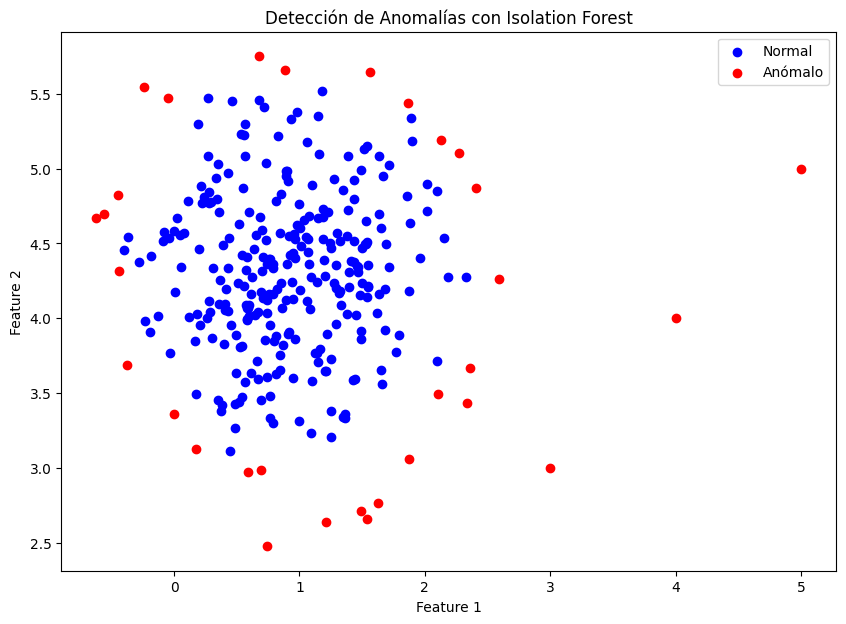

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs

# Generar datos de ejemplo con clusters y algunos outliers
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.60, random_state=0)
# Añadir algunos outliers
X = np.vstack([X, np.array([[3, 3], [4, 4], [5, 5]])])

# Crear y ajustar el modelo Isolation Forest
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X)

# Hacer predicciones
y_pred = model.predict(X)

# Visualizar los resultados
plt.figure(figsize=(10, 7))
# Plotea los puntos normales
plt.scatter(X[y_pred == 1][:, 0], X[y_pred == 1][:, 1], color='blue', label='Normal')
# Plotea los outliers
plt.scatter(X[y_pred == -1][:, 0], X[y_pred == -1][:, 1], color='red', label='Anómalo')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Detección de Anomalías con Isolation Forest')
plt.legend()
plt.show()


In [4]:
from sklearn.cluster import KMeans

# Crear y ajustar el modelo
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_transformed)

# Predicciones
clusters = kmeans.predict(X_transformed)

# Visualizar los clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('Clustering con K-Means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


NameError: name 'X_transformed' is not defined